In [1]:
## 利用するライブラリをインポート
import MeCab
import unidic_lite
import re
import sys

## MeCab をセットアップ
tagger = MeCab.Tagger()

## neko.txt を形態素解析した結果を neko.txt.mecab に保存
INFILE = 'neko.txt'
OUTFILE = 'neko.txt.mecab'
with open(INFILE, encoding='utf-8') as f_in:
    with open(OUTFILE, 'w', encoding='utf-8') as f_out:
        for line in f_in:
            result = tagger.parse(line)
            f_out.write(result)

In [2]:
## 30. neko.txt.mecab を読み込み、1文を形態素（各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型）のリストとして格納
FILENAME = 'neko.txt.mecab'
i = 0

words = []
with open(FILENAME, encoding='utf-8') as f_in:
    for line in f_in:
        if re.search(r'^EOS', line):
            words.append({'surface': 'EOS', 'base': '', 'pos': '', 'pos1': ''})
        else:
            _result = line.split('\t')
            _surface = _result[0]
            _base = _result[3]
            _pos = _result[4]
            _pos1 = _result[5]
            words.append({'surface': _surface, 'base': _base, 'pos': _pos, 'pos1': _pos1})

print(FILENAME, 'includes', len(words), 'words.')

neko.txt.mecab includes 219229 words.


In [3]:
# 31. 動詞の表層形をすべて抽出
verb_surfaces = {}
for word in words:
    if re.search(r'^動詞', word['pos']):
        if word['surface'] not in verb_surfaces.keys():
            verb_surfaces[word['surface']] = 0
        verb_surfaces[word['surface']] = verb_surfaces[word['surface']] + 1
        
# 表層形の数
print(len(verb_surfaces), 'verb surfaces.')

# 出現数順に上位10件の表層形を出力
verb_surfaces_sorted = sorted(verb_surfaces.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(i+1, verb_surfaces_sorted[i])

4071 verb surfaces.
1 ('し', 2470)
2 ('ある', 1693)
3 ('いる', 1255)
4 ('する', 1056)
5 ('云う', 937)
6 ('なっ', 407)
7 ('なる', 399)
8 ('来', 377)
9 ('い', 366)
10 ('見', 362)


In [4]:
# 32. 動詞の基本形をすべて抽出
verb_basic_forms = {}
for word in words:
    if re.search(r'^動詞', word['pos']):
        if word['surface'] not in verb_basic_forms.keys():
            verb_basic_forms[word['surface']] = 0
        verb_basic_forms[word['surface']] = verb_basic_forms[word['surface']] + 1
        
# 表層形の数 (ユニーク)
print(len(verb_basic_forms), 'verb_basic_forms.')

# 出現数順に上位10件の表層形を出力
verb_basic_forms_sorted = sorted(verb_basic_forms.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(i+1, verb_basic_forms_sorted[i])

4071 verb_basic_forms.
1 ('し', 2470)
2 ('ある', 1693)
3 ('いる', 1255)
4 ('する', 1056)
5 ('云う', 937)
6 ('なっ', 407)
7 ('なる', 399)
8 ('来', 377)
9 ('い', 366)
10 ('見', 362)


In [5]:
# 33 2つの名詞が「の」で連結されている名詞句を抽出
AnoB = {}
for i in range(1,len(words)-1):
    word_0 = words[i-1]
    word_1 = words[i]
    word_2 = words[i+1]
    if re.search(r'^名詞', word_0['pos']) and re.search(r'^の$', word_1['surface']) and re.search(r'^名詞', word_2['pos']):
        _AnoB = word_0['surface'] + word_1['surface'] + word_2['surface']
        if _AnoB not in AnoB.keys():
            AnoB[_AnoB] = 0
        AnoB[_AnoB] = AnoB[_AnoB] + 1
        
# 表層形の数
print(len(AnoB), 'AnoB.')

# 出現数順に上位10件の表層形を出力
AnoB_sorted = sorted(AnoB.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(i+1, AnoB_sorted[i])

3908 AnoB.
1 ('学校の生徒', 15)
2 ('車屋の黒', 14)
3 ('主人の方', 13)
4 ('畳の上', 13)
5 ('腹の中', 12)
6 ('主人の頭', 12)
7 ('秋の日', 11)
8 ('車屋の神', 10)
9 ('椽の下', 9)
10 ('無言のまま', 9)


In [6]:
# 34 名詞の連接（連続して出現する名詞）を最長一致で抽出
noun_concats = {}
noun_concat = ''
for word in words:
    if re.search(r'^名詞', word['pos']):
        noun_concat = noun_concat + word['surface']
    else:
        if noun_concat != '':
            if noun_concat not in noun_concats.keys():
                noun_concats[noun_concat] = 0
            noun_concats[noun_concat] = noun_concats[noun_concat] + 1
        noun_concat = ''

# 名詞の連接の数
print(len(noun_concats), 'noun_concats.')

# 名詞の連接の出現数上位10件の表層形を出力
print('## 出現数順')
noun_concats_sorted = sorted(noun_concats.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(i+1, noun_concats_sorted[i])
    
# 名詞の連接の文字列長の上位10件の表層形を出力
print('## 名詞の連接の文字列長の順')
noun_concat_length = []
for key in noun_concats.keys():
    noun_concat_length.append({'noun_concat': key, 'count': noun_concats[key], 'length': len(key)})
noun_concats_sorted = sorted(noun_concat_length, key=lambda x:x['length'], reverse=True)
for i in range(10):
    print(i+1, noun_concats_sorted[i])


9261 noun_concats.
## 出現数順
1 ('事', 1198)
2 ('もの', 966)
3 ('主人', 899)
4 ('ところ', 377)
5 ('人', 353)
6 ('迷亭', 292)
7 ('顔', 268)
8 ('方', 266)
9 ('時', 265)
10 ('人間', 260)
## 名詞の連接の文字列長の順
1 {'noun_concat': 'Archaiomelesidonophrunicherata', 'count': 1, 'length': 30}
2 {'noun_concat': 'チーン南無猫誉信女南無阿弥陀仏南無阿弥陀仏', 'count': 1, 'length': 21}
3 {'noun_concat': 'twixtthecupandthelip', 'count': 1, 'length': 20}
4 {'noun_concat': 'Doyouseetheboy', 'count': 1, 'length': 14}
5 {'noun_concat': 'ワハハハハハサヴェジ・チー', 'count': 1, 'length': 13}
6 {'noun_concat': '明治三十八年何月何日戸締り', 'count': 1, 'length': 13}
7 {'noun_concat': '南無阿弥陀仏南無阿弥陀仏', 'count': 2, 'length': 12}
8 {'noun_concat': 'タークイン・ゼ・プラウド', 'count': 1, 'length': 12}
9 {'noun_concat': 'オタンチン・パレオロガス', 'count': 6, 'length': 12}
10 {'noun_concat': 'せんだってトチメンボー', 'count': 1, 'length': 11}


In [7]:
# 35 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．
surfaces = {}
for word in words:
    if word['surface'] != 'EOS' and not re.search(r'^補助記号', word['pos']):
        if word['surface'] not in surfaces.keys():
            surfaces[word['surface']] = 0
        surfaces[word['surface']] = surfaces[word['surface']] + 1
        
# 表層形の数 (ユニーク)
print(len(surfaces), 'surfaces.')

# 出現数順に上位10件の表層形を出力
surfaces_sorted = sorted(surfaces.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(i+1, surfaces_sorted[i])

13733 surfaces.
1 ('の', 9541)
2 ('て', 7418)
3 ('に', 7060)
4 ('は', 6501)
5 ('と', 6156)
6 ('を', 6119)
7 ('が', 5394)
8 ('で', 4543)
9 ('た', 3974)
10 ('も', 3238)


0 の
1 て
2 に
3 は
4 と
5 を
6 が
7 で
8 た
9 も


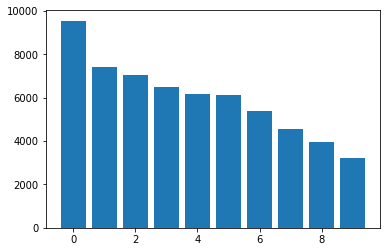

In [8]:
# 36 出現頻度が高い10語とその出現頻度をグラフで表示
import matplotlib.pyplot as plt
left = []
height = []
label = []
for i in range(10):
    _surface, _height = surfaces_sorted[i]
    left.append(i)
    label.append(_surface)
    height.append(_height)
    print(i, _surface)
        
plt.bar(left, height)
plt.show()

1 ('事', 45)
2 ('人間', 34)
3 ('もの', 28)
4 ('一', 21)
5 ('主人', 17)
6 ('ところ', 12)
7 ('顔', 9)
8 ('上', 9)
9 ('自分', 8)
10 ('先生', 8)


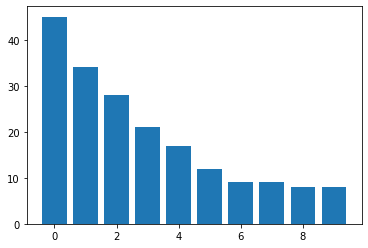

In [29]:
# 37 「猫」と共起頻度が高い10語とその出現頻度をグラフで表示
neko_cooccurrnce = {}
surfaces = []
for word in words:
    if word['surface'] != 'EOS':
        # if re.search(r'^(名詞|動詞|形容詞|形容動詞)', word['pos']) and word['surface'] not in surfaces:
        if re.search(r'^名詞', word['pos']) and word['surface'] not in surfaces:
            surfaces.append(word['surface'])
    else:
        if '猫' in surfaces:
            for surface in surfaces:
                if surface != '猫':
                    if surface not in neko_cooccurrnce.keys():
                        neko_cooccurrnce[surface] = 0
                    neko_cooccurrnce[surface] = neko_cooccurrnce[surface] + 1
        surfaces = []

# 共起回数順に上位10件を出力
neko_cooccurrnce_sorted = sorted(neko_cooccurrnce.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(i+1, neko_cooccurrnce_sorted[i])

# グラフで出力
left = []
height = []
label = []
for i in range(10):
    _surface, _height = neko_cooccurrnce_sorted[i]
    left.append(i)
    label.append(_surface)
    height.append(_height)
        
plt.bar(left, height)
plt.show()     
        

13732 surfaces.


(array([1.3544e+04, 8.8000e+01, 3.6000e+01, 1.3000e+01, 7.0000e+00,
        9.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

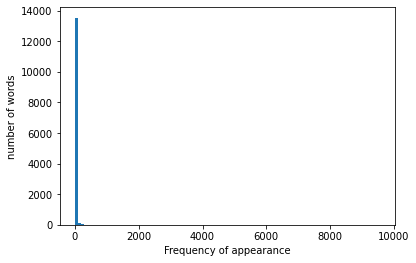

In [28]:
# 38 単語の出現頻度のヒストグラム (横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛)
surfaces = {}
for word in words:
    if word['surface'] != 'EOS' and word['surface'] != '　' and not re.search(r'^補助記号', word['pos']):
        if word['surface'] not in surfaces.keys():
            surfaces[word['surface']] = 0
        surfaces[word['surface']] = surfaces[word['surface']] + 1
        
# 表層形の数 (ユニーク)
print(len(surfaces), 'surfaces.')

# ヒストグラムを表示
x = []
i = 0
for key in surfaces.keys():
    x.append(surfaces[key])

plt.ylabel("number of words")
plt.xlabel("Frequency of appearance")
plt.hist(x, bins=100)

13732 surfaces.


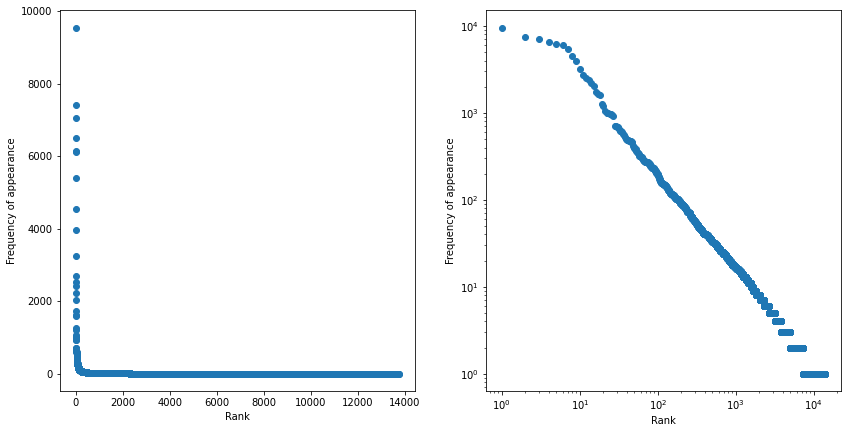

In [37]:
# 39 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロット
surfaces = {}
for word in words:
    if word['surface'] != 'EOS' and word['surface'] != '　' and not re.search(r'^補助記号', word['pos']):
        if word['surface'] not in surfaces.keys():
            surfaces[word['surface']] = 0
        surfaces[word['surface']] = surfaces[word['surface']] + 1
        
# 表層形の数 (ユニーク)
print(len(surfaces), 'surfaces.')

# 出現順位と出現頻度を log-log でプロット
import math
surfaces_sorted = sorted(surfaces.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
i = 1
for _surface in surfaces_sorted:
    x.append(i)
    y.append(_surface[1])
    i = i + 1

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency of appearance")
ax1.scatter(x, y)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Rank")
ax2.set_ylabel("Frequency of appearance")
ax2.scatter(x, y)